In [1]:
#!pip install pmdarima

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)


In [3]:
data=pd.read_csv(r'C:\Users\Aditya Desai\Downloads\time series\Timeseries\exchange_rate.csv',parse_dates=['date'], dayfirst=True, index_col='date')
data

,Ex_rate
date,
1990-01-01,0.785500
1990-01-02,0.781800
1990-01-03,0.786700
1990-01-04,0.786000
1990-01-05,0.784900
...,...
2010-10-06,0.718494
2010-10-07,0.721839
2010-10-08,0.723197


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7588 entries, 1990-01-01 to 2010-10-10
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ex_rate  7588 non-null   float64
dtypes: float64(1)
memory usage: 118.6 KB


In [5]:
data.shape

(7588, 1)

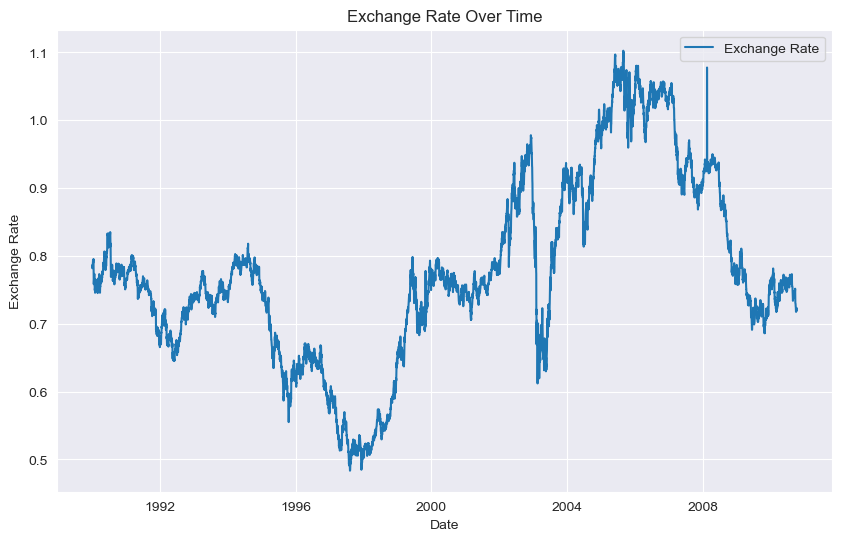

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(data['Ex_rate'], label='Exchange Rate')
plt.title('Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

In [7]:
# Data preprocessing

In [8]:
data['Ex_rate'].isnull().sum()

0

In [9]:
# Handling missing values by forward filling
data.fillna(method='ffill', inplace=True)
data.fillna(method='bfill', inplace=True)

In [10]:
print(data.isnull().sum())

Ex_rate    0
dtype: int64


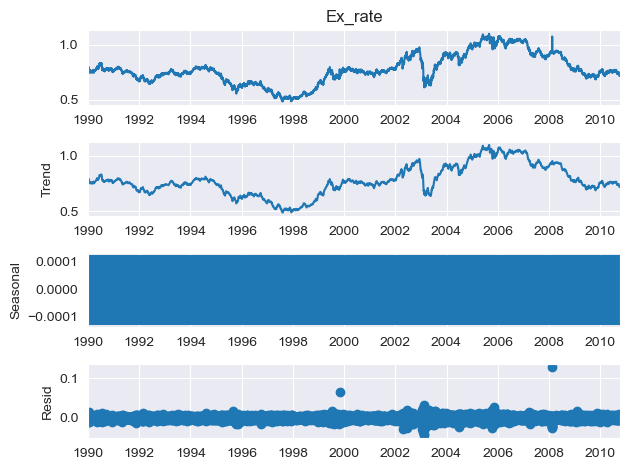

In [11]:
import statsmodels.api as sm

decomposition = sm.tsa.seasonal_decompose(data['Ex_rate'], model='additive', 
                            extrapolate_trend='freq') #additive or multiplicative is data specific

fig = decomposition.plot()
plt.show()

## Model Building - ARIMA 

### Stationarity and differencing 

#### check the stationarity of the time series and perform differencing if needed.

In [12]:
from statsmodels.tsa.stattools import adfuller

In [13]:
# Perform the Augmented Dickey-Fuller test
result = adfuller(data['Ex_rate'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -1.664994180738223
p-value: 0.4492327353597537


### Null hypothesis: data is stationary

### Alternative hypothesis: data is not stationary

#### If p<0.05 ; data is stationary 

#### If p>0.05 ; data is not stationary  

In [14]:
if result[1] > 0.05:
    data['Exchange_rate_diff'] = data['Ex_rate'].diff().dropna()
else:
    data['Exchange_rate_diff'] = data['Ex_rate']

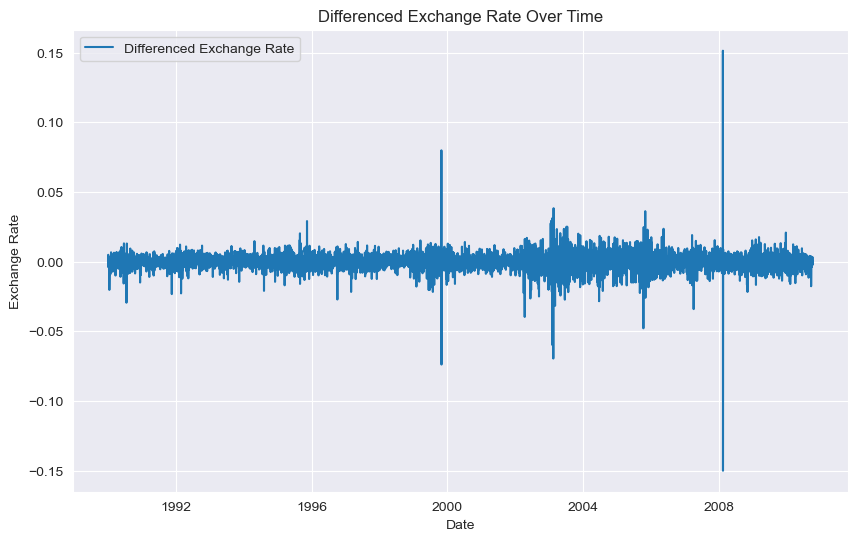

In [15]:
# Plot the differenced time series
plt.figure(figsize=(10, 6))
plt.plot(data['Exchange_rate_diff'], label='Differenced Exchange Rate')
plt.title('Differenced Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

### Parameter selection for ARIMA

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

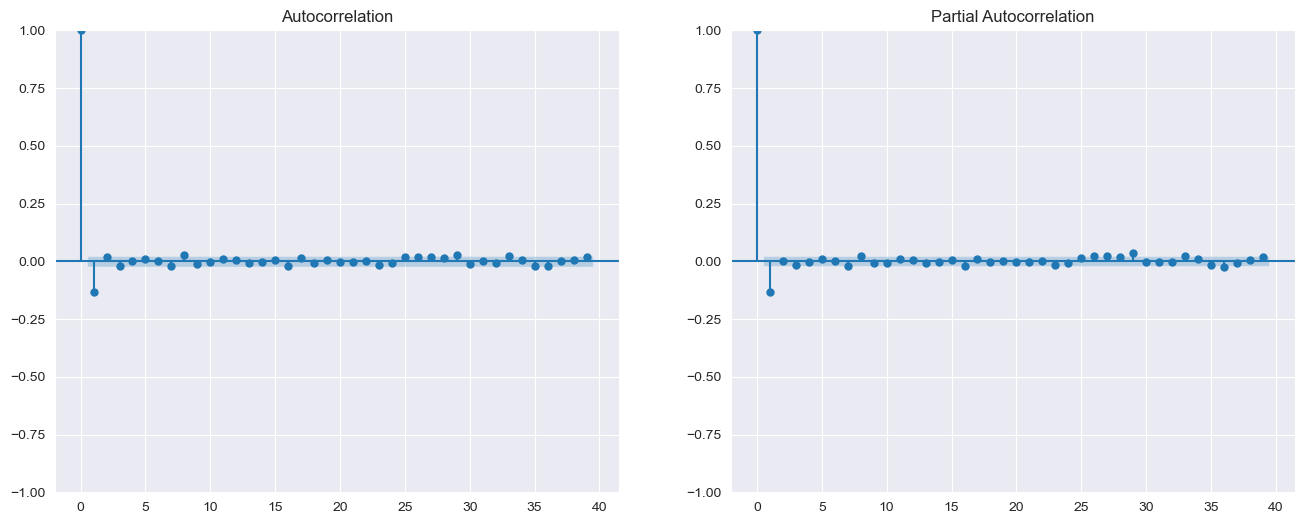

In [17]:
# Plot ACF and PACF for the differenced series
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plot_acf(data['Exchange_rate_diff'].dropna(), ax=axes[0])
plot_pacf(data['Exchange_rate_diff'].dropna(), ax=axes[1])
plt.show()

### Model Fitting

In [18]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

In [19]:
#find out order of arima

In [20]:
order=auto_arima(data['Ex_rate'])

In [21]:
order

ARIMA(order=(1, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [22]:
# Define the ARIMA model
arima_model = ARIMA(data['Ex_rate'], order=(1,1,1))
arima_result = arima_model.fit()


C:\Users\Aditya Desai\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Aditya Desai\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Aditya Desai\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [23]:
# Summary of the ARIMA model
print(arima_result.summary())

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Tue, 02 Jul 2024   AIC                         -56102.322
Time:                        21:57:24   BIC                         -56081.519
Sample:                    01-01-1990   HQIC                        -56095.182
                         - 10-10-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.608      0.0

In [24]:
data.shape

(7588, 2)

In [25]:
#spliting data

In [26]:
train=data.iloc[:-2276]
test=data.iloc[-2276:]

In [27]:
# Train the ARIMA model on the training data
arima_model = ARIMA(train['Ex_rate'], order=(1, 1, 1))
arima_result = arima_model.fit()

C:\Users\Aditya Desai\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Aditya Desai\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Aditya Desai\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [28]:
# Forecasting for the testing period
forecast_steps = len(test)
forecast = arima_result.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=test.index[0], periods=forecast_steps, freq='W')
forecast_series = pd.Series(forecast.predicted_mean.values, index=forecast_index)

In [29]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [30]:
# Calculate error metrics for the test period
mae = mean_absolute_error(test['Ex_rate'], forecast_series)
rmse = mean_squared_error(test['Ex_rate'], forecast_series, squared=False)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")


MAE: 0.11941089221797105
RMSE: 0.13258027497391994


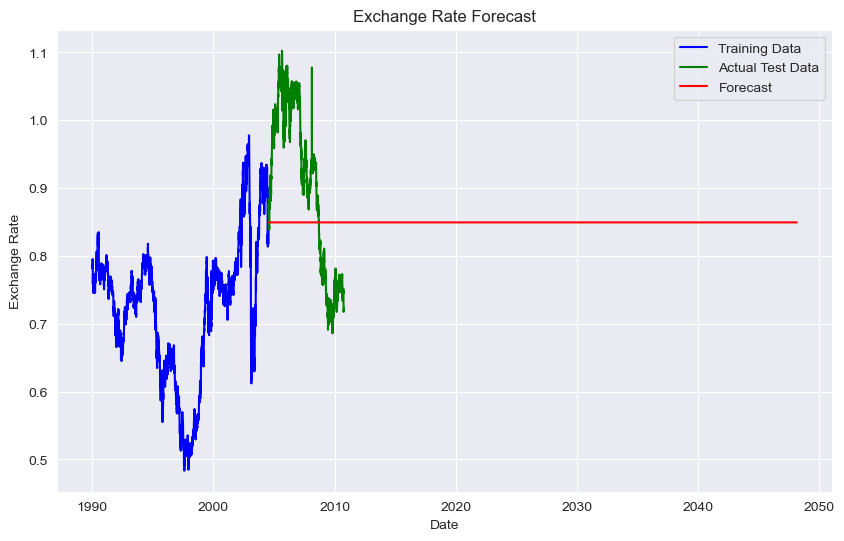

In [31]:
# Visualize the actual values alongside the predicted values
plt.figure(figsize=(10, 6))
plt.plot(train['Ex_rate'], label='Training Data', color='blue')
plt.plot(test['Ex_rate'], label='Actual Test Data', color='green')
plt.plot(forecast_series, label='Forecast', color='red')
plt.title('Exchange Rate Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

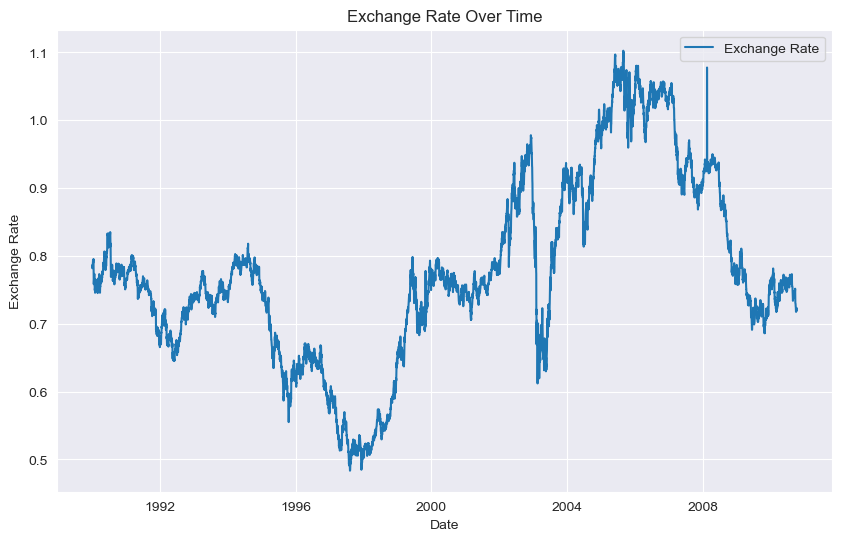

In [32]:
# For Comparison
# Plotting the time series for Exchange_rate
plt.figure(figsize=(10, 6))
plt.plot(data['Ex_rate'], label='Exchange Rate')
plt.title('Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

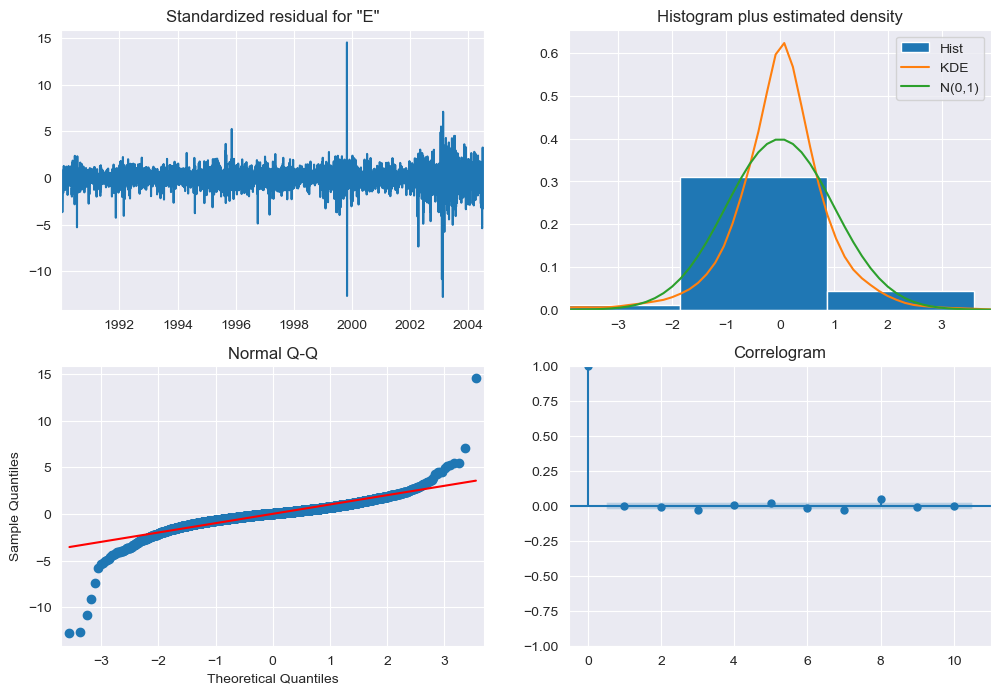

In [33]:
# Diagnostics plot for ARIMA model
arima_result.plot_diagnostics(figsize=(12, 8))
plt.show()

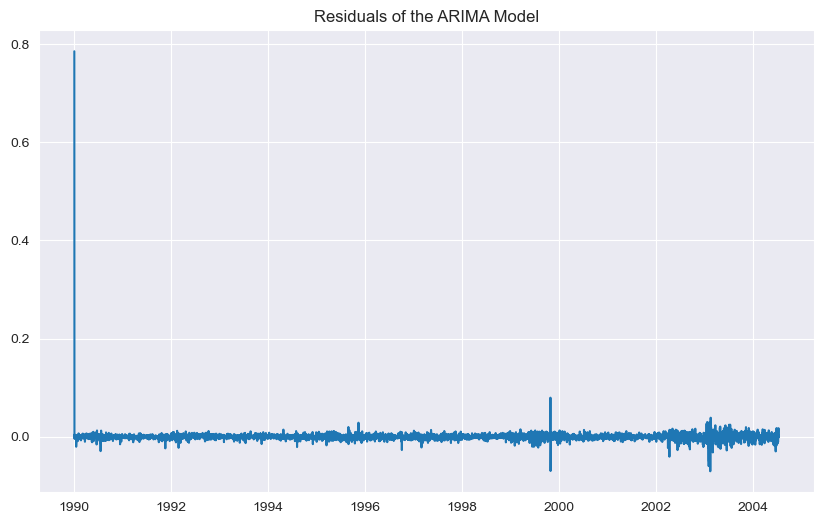

In [34]:
# Plot residuals
residuals = arima_result.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals of the ARIMA Model')
plt.show()

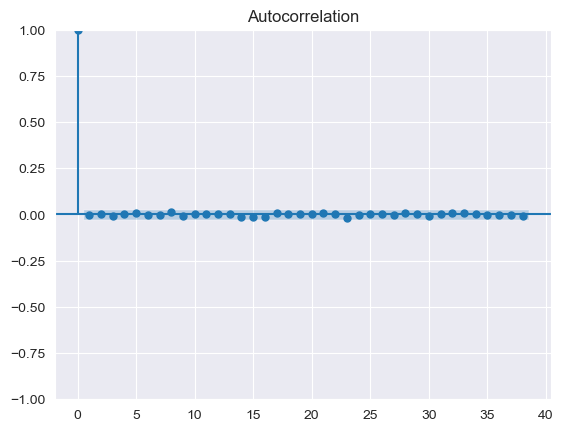

In [35]:
# Plot ACF of residuals
plot_acf(residuals)
plt.show()

## Model Building - Exponential Smoothing 

### Model selection

In [36]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [37]:
# Define the Holt-Winters model
hw_model = ExponentialSmoothing(data['Ex_rate'], trend='add', seasonal=None, seasonal_periods=12)
hw_result = hw_model.fit()

C:\Users\Aditya Desai\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [38]:
# Summary of the Holt-Winters model
print(hw_result.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                  Ex_rate   No. Observations:                 7588
Model:             ExponentialSmoothing   SSE                              0.273
Optimized:                         True   AIC                         -77641.009
Trend:                         Additive   BIC                         -77613.272
Seasonal:                          None   AICC                        -77640.998
Seasonal Periods:                  None   Date:                 Tue, 02 Jul 2024
Box-Cox:                          False   Time:                         21:57:26
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.8700401                alpha                 True
smoothing_trend             0.0000

In [39]:
# Forecasting

hw_forecast = hw_result.forecast(steps=len(test))
hw_forecast_series = pd.Series(hw_forecast.values, index=forecast_index)

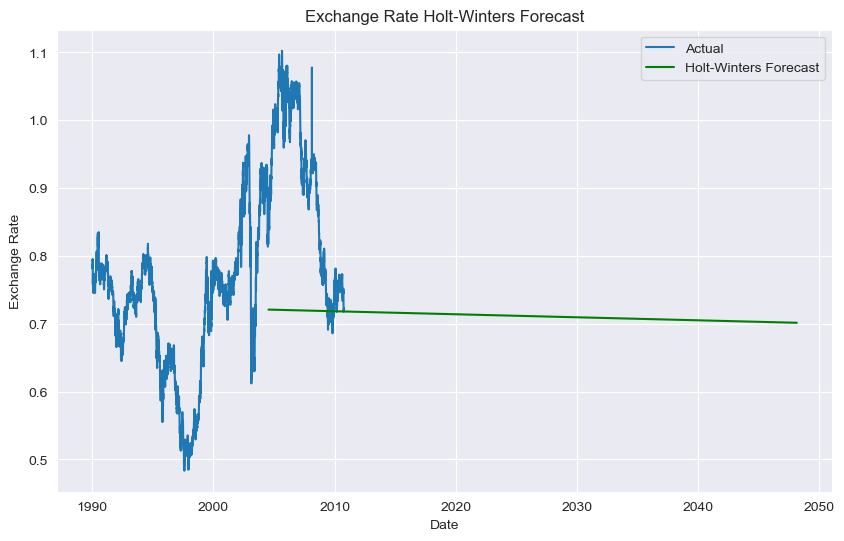

In [40]:
# Plotting the Holt-Winters forecast
plt.figure(figsize=(10, 6))
plt.plot(data['Ex_rate'], label='Actual')
plt.plot(hw_forecast_series, label='Holt-Winters Forecast', color='green')
plt.title('Exchange Rate Holt-Winters Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

### Hypertuning

In [41]:
# Define the parameter grid for Holt-Winters Exponential Smoothing
param_grid = {
    'trend': ['add', 'mul', None],
    'seasonal': ['add', 'mul', None],
    'seasonal_periods': [7, 12, 30]  # Assuming daily data with weekly, monthly seasonality
}

In [42]:
# Generate all combinations of parameters
from itertools import product
params = list(product(param_grid['trend'], param_grid['seasonal'], param_grid['seasonal_periods']))


In [43]:
# Initialize variables to store the best parameters and the corresponding score
best_params = None
best_mae = float('inf')

In [44]:
# Perform Grid Search
for trend, seasonal, seasonal_periods in params:
    try:
        hw_model = ExponentialSmoothing(train['Ex_rate'], trend=trend, seasonal=seasonal, seasonal_periods=seasonal_periods)
        hw_result = hw_model.fit()
        hw_forecast = hw_result.forecast(steps=len(test))
        mae = mean_absolute_error(test['Ex_rate'], hw_forecast)
        
        # Update best parameters if current MAE is lower than the best MAE
        if mae < best_mae:
            best_mae = mae
            best_params = (trend, seasonal, seasonal_periods)
    except Exception as e:
        # Print the exception if occurs and continue
        print(f"Exception for parameters (trend={trend}, seasonal={seasonal}, seasonal_periods={seasonal_periods}): {e}")
        continue

if best_params is not None:
    print(f"Best parameters: Trend={best_params[0]}, Seasonal={best_params[1]}, Seasonal Periods={best_params[2]}")
    print(f"Best MAE: {best_mae}")
else:
    print("No best parameters found.")

C:\Users\Aditya Desai\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Aditya Desai\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Aditya Desai\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Aditya Desai\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Aditya Desai\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferre

Best parameters: Trend=mul, Seasonal=mul, Seasonal Periods=12
Best MAE: 0.11823023013944153


C:\Users\Aditya Desai\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Aditya Desai\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Aditya Desai\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Aditya Desai\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [45]:
# Fit the model with the best parameters
hw_model = ExponentialSmoothing(train['Ex_rate'], trend=best_params[0], seasonal=best_params[1], seasonal_periods=best_params[2])
hw_result = hw_model.fit()
hw_forecast = hw_result.forecast(steps=len(test))


C:\Users\Aditya Desai\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [46]:
# Calculate error metrics for the test period
mae = mean_absolute_error(test['Ex_rate'], hw_forecast)
rmse = mean_squared_error(test['Ex_rate'], hw_forecast, squared=False)
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

MAE: 0.11823023013944153
RMSE: 0.1329185387959676


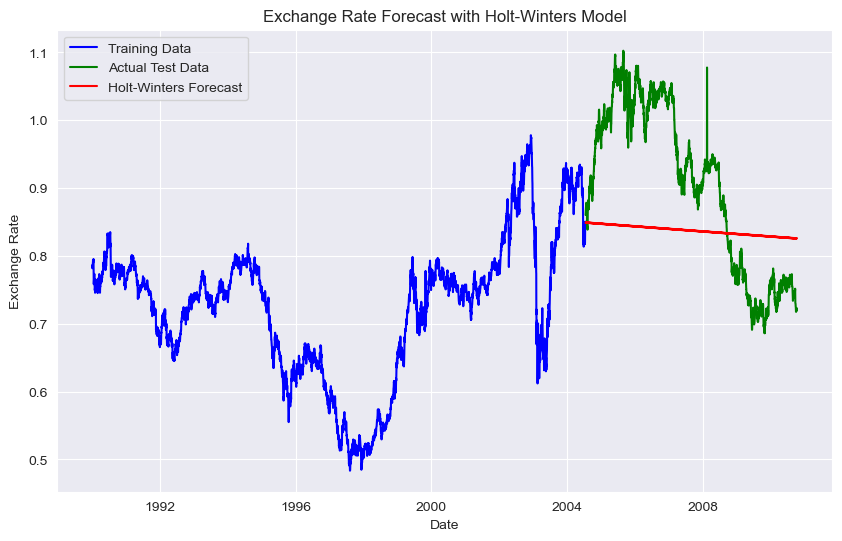

In [47]:
# Visualize the actual values alongside the predicted values
plt.figure(figsize=(10, 6))
plt.plot(train['Ex_rate'], label='Training Data', color='blue')
plt.plot(test['Ex_rate'], label='Actual Test Data', color='green')
plt.plot(hw_forecast, label='Holt-Winters Forecast', color='red')
plt.title('Exchange Rate Forecast with Holt-Winters Model')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

## Evaluation and comparision

In [48]:
# Define a function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [49]:
# Calculate error metrics for ARIMA
mae_arima = mean_absolute_error(data['Ex_rate'][-2276:], forecast_series)
rmse_arima = mean_squared_error(data['Ex_rate'][-2276:], forecast_series, squared=False)
mape_arima = mean_absolute_percentage_error(data['Ex_rate'][-2276:], forecast_series)
print(f"ARIMA Model - MAE: {mae_arima}, RMSE: {rmse_arima}, MAPE: {mape_arima}")

ARIMA Model - MAE: 0.11941089221797105, RMSE: 0.13258027497391994, MAPE: 13.03439216120726


In [50]:
# Calculate error metrics for Holt-Winters
mae_hw = mean_absolute_error(data['Ex_rate'][-2276:], hw_forecast_series)
rmse_hw = mean_squared_error(data['Ex_rate'][-2276:], hw_forecast_series, squared=False)
mape_hw = mean_absolute_percentage_error(data['Ex_rate'][-2276:], hw_forecast_series)
print(f"Holt-Winters Model - MAE: {mae_hw}, RMSE: {rmse_hw}, MAPE: {mape_hw}")

Holt-Winters Model - MAE: 0.19214772254574955, RMSE: 0.2245270310330409, MAPE: 18.957064879417427
